## Prep Work

**Import the libraries**

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

from datetime import datetime, date, time

**Import algorithms**

In [2]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

**Load Data**

In [3]:
# Load data from CSV
df_train_init = pd.read_csv('data/data_train.csv')
df_test_init = pd.read_csv('data/data_test.csv')
df_features_init = pd.read_csv('data/features.csv', sep='\t')

In [4]:
df_train_init.head(2)

,Unnamed: 0,id,vas_id,buy_time,target
0,0,540968,8.0,1537131600,0.0
1,1,1454121,4.0,1531688400,0.0


In [5]:
df_test_init.head(2)

,Unnamed: 0,id,vas_id,buy_time
0,0,3130519,2.0,1548018000
1,1,2000860,4.0,1548018000


In [6]:
df_features_init.head(2)

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,0,2013026,1531688400,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,49.520873,38.19189,-0.000725,-0.016435,-0.107041,-1.17746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-42.026959,-2841.496068,-1085.821501,-1755.674564,-89.504287,-119.724355,-70.712019,-54.069191,-16.642826,-7.896282,...,0.0,0.039208,0.665644,-0.008999,-11953.712824,-45175.257711,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,9.595373e+08,-42.014078,-4.405604e+08,1.356414e+09,5.565998,-1.465191,-33.302382,-249.128986,-36.772492,-0.364694,-0.133771,-0.209468,-32.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-84.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2014722,1539550800,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,-53.216097,-6.78366,-26.544905,-2.736081,-4.007526,-2.558912,67.300873,55.97189,-0.000725,-0.016435,-0.107041,15.77254,-3.178521,411.379185,-10.744164,-0.094251,-0.001733,-0.009327,131.407791,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2937.657200,-1181.982633,-1755.674564,447.193953,1258.981645,-119.662019,-54.602524,-65.059494,29.770382,...,0.0,0.039208,-0.334356,-0.008999,-1035.951824,-45175.257711,-0.622901,-30.716053,-61790.157098,0.756864,-39131.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.673997e+08,-39.474078,1.033869e+09,-1.204418e+08,5.232666,-0.465191,-33.302382,38.871014,4.227508,-0.364694,-0.133771,-0.209468,2.643495,-109.884564,-573.69102,3.631719,43.889293,-108.409742,-509.437331,-27.617978,-5.295406,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0


**OBSERVATIONS**:
* the first column in all datasets doesn't bring any useful information and it can be removed
* 'buy_time' should be converted to datetime formate
* We can merge train/test datasets with features sets by id column on buy_time column

In [7]:
# Drop the first column for all 3 datasets
df_train_init.drop(columns=df_train_init.columns[0], inplace=True)
df_test_init.drop(columns=df_test_init.columns[0], inplace=True)
df_features_init.drop(columns=df_features_init.columns[0], inplace=True)

In [8]:
# Update buy_time
df_train_init['buy_time'] = [datetime.fromtimestamp(x) for x in df_train_init['buy_time']]
df_test_init['buy_time'] = [datetime.fromtimestamp(x) for x in df_test_init['buy_time']]
df_features_init['buy_time'] = [datetime.fromtimestamp(x) for x in df_features_init['buy_time']]

In [9]:
# Merge train/test and feature datasets
df_train_init = df_train_init.sort_values(by="buy_time")
df_test_init = df_test_init.sort_values(by="buy_time")
df_features_init = df_features_init.sort_values(by="buy_time")
df_train= pd.merge_asof(df_train_init, df_features_init, by="id", on = 'buy_time', direction="nearest",)
df_test= pd.merge_asof(df_test_init, df_features_init, by="id", on = 'buy_time', direction="nearest")

## EDA

### Basic Information

In [10]:
# Dataframe dimensions
print("df_train.shape = {} rows, {} cols".format(*df_train.shape))
print("df_test.shape = {} rows, {} cols".format(*df_test.shape))

df_train.shape = 831653 rows, 257 cols
df_test.shape = 71231 rows, 256 cols


**OBSERVATIONS**:
* We have 831653 observations on train and 71231 on test datasets
* We have 256 features in the df_features dataframe

In [11]:
# Dataframe types
print("df_train.dtypes.unique(): {}".format(df_train.dtypes.unique()))
print("df_test.dtypes.unique(): {}".format(df_test.dtypes.unique()))

df_train.dtypes.unique(): [dtype('int64') dtype('float64') dtype('<M8[ns]')]
df_test.dtypes.unique(): [dtype('int64') dtype('float64') dtype('<M8[ns]')]


**OBSERVATIONS**:
* Both datasets have only numeric features, so we might have to identify discrete/categorical features by the number of unique values later

In [12]:
df_train.head()

,id,vas_id,buy_time,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,2582523,2.0,2018-07-09,0.0,314.560029,9.290888,342.989214,7.523202,337.571754,-13.58179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,340.590873,329.26189,-0.000725,-0.016435,-0.107041,-5.41746,1.401479,28.429185,-10.744164,-0.094251,-0.001733,-0.009327,2.497791,0.200138,-0.00909,0.648138,0.785634,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,307.973041,9728.201596,-330.600797,10058.802436,-89.504287,-119.724355,-6.012019,4.514146,-10.526161,...,0.0,0.039208,-0.334356,-0.008999,1482.274176,-40034.257711,0.377099,159.323947,-61602.817098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,9.724973e+08,348.235922,-4.405604e+08,-1.204418e+08,5.613617,-0.465191,-32.302382,193.871014,16.227508,-0.364694,-0.133771,-0.209468,19.643495,-109.884564,854.30898,-4.368281,660.889293,-108.409742,309.562669,508.382022,305.704594,6488.626154,-574.770792,-24.996269,121.369552,142.252276,-16.832889,-0.694428,-11.175933,-0.45614,0.0
1,1292549,2.0,2018-07-09,0.0,93.880029,-217.499112,79.939214,-270.106798,74.521754,-291.21179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,124.490873,113.16189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,57.973041,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,-33.478685,-2.552524,-30.926164,...,0.0,0.039208,-0.334356,-0.008999,-11953.712824,-45175.257711,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,9.648941e+08,132.135922,-4.405604e+08,-1.204418e+08,14.399332,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,4053116,1.0,2018-07-09,0.0,125.110029,152.190888,111.169214,107.213202,105.751754,86.10821,-16.08618,-56.686097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,51.480873,144.39189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,57.973041,-2942.440404,-1186.765837,-1755.674564,-87.628311,2879.306845,-119.662019,-54.602524,-65.059494,...,0.0,0.039208,-0.334356,-0.008999,19161.031176,-42621.257711,0.377099,-44.806053,-61824.077098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,9.629933e+08,-41.734078,-4.405604e+08,-1.204418e+08,0.343777,-1.465191,-33.302382,-224.128986,54.227508,-0.364694,-0.133771,-0.209468,58.643495,-109.884564,861.30898,4.631719,-247.110707,8.590258,1098.562669,80.382022,-17.295406,-956.373846,-613.770792,-18.996269,761.369552,-213.747724,26.167111,-0.694428,39.824067,-0.45614,1.0
3,4158361,2.0,2018-07-09,0.0,-7.829971,-266.839112,-20.500786,-304.196798,-25.918246,-325.30179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,22.780873,11.45189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-12.670815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,0.648138,0.785634,0.788392,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-30.827104,-1186.709196,1155.882036,-89.504287,-119.724355,17.687981,45.730812,-28.042828,...,0.0,0.039208,-0.33

In [13]:
df_train.tail()

,id,vas_id,buy_time,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
831648,555080,5.0,2018-12-31,0.0,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,-0.799862,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2942.440404,-1186.765837,-1755.674564,-89.280654,-119.724355,-119.662019,-54.602524,-65.059494,...,0.0,0.039208,-0.334356,-0.008999,8150.482176,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,17.566000,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
831649,1729471,5.0,2018-12-31,0.0,-86.209971,-397.589112,-100.150786,-450.196798,-105.568246,-471.30179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-66.92811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,-0.799862,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,-117.562019,-53.335857,-64.226161,...,0.0,0.039208,-0.334356,-0.008999,-6936.397824,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,11.399332,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
831650,3676177,2.0,2018-12-31,0.0,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,-0.799862,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,-119.512019,-54.452524,-65.059494,...,0.0,0.039208,-0.334356,-0.008999,-8786.737224,559624.742289,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,58.899332,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
831651,2255038,2.0,2018-12-31,0.0,-96.799971,49.450888,-104.390786,219.293202,-109.808246,200.30821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-7.590815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,994.523041,-2942.440404,-118

In [14]:
df_test.head()

,id,vas_id,buy_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,2905850,5.0,2019-01-07,326.930029,227.410888,312.989214,200.223202,307.571754,179.11821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,357.540873,346.21189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,2604.991196,-765.412317,3370.403436,-89.504287,-119.724355,-112.262019,-48.269191,-63.992827,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,-11953.712824,-32003.257711,-0.622901,-66.356053,-61855.797098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.643757e+08,365.185922,-4.405604e+08,-1.204418e+08,-8.900668,-1.465191,-33.302382,-208.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,894.30898,-1.368281,-157.110707,-41.409742,1097.562669,-87.617978,-17.295406,-464.373846,-104.770792,-25.996269,-18.630448,-209.747724,-15.832889,-0.694428,-2.175933,-0.45614,0.0
1,31619,2.0,2019-01-07,-96.799971,100.290888,-62.040786,250.953202,-67.458246,229.84821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,34.759185,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2936.883762,-1181.209195,-1755.674564,-89.504287,-119.724355,88.737981,73.747476,14.990501,-7.896282,...,0.0,0.039208,0.665644,-0.008999,-11953.712824,-45175.257711,-0.622901,-30.716053,-61790.157098,0.756864,-39961.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.643757e+08,-53.464078,1.041311e+09,-1.204418e+08,13.099332,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,1427271,6.0,2019-01-07,-87.299971,-368.999112,339.439214,48.733202,334.021754,27.62821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-56.689127,-68.01811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,426.739185,380.115836,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,1.648138,1.785634,0.788392,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,4255.140596,-611.515837,4866.656436,-89.504287,-119.724355,-115.278686,-50.219191,-65.059494,14.187052,...,0.0,0.039208,0.665644,-0.008999,6662.920176,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.609197e+08,-53.794078,-4.405604e+08,-1.204418e+08,8.565998,-1.465191,-33.302382,395.871014,-18.772492,-0.364694,-0.133771,-0.209468,-14.356505,-109.884564,328.30898,-1.368281,945.889293,-108.409742,-507.437331,104.382022,-17.295406,928.626154,-548.770792,0.003731,-37.630448,116.252276,25.167111,-0.694428,38.824067,-0.45614,0.0
3,2162521,6.0,2019-01-07,-96.799971,-20.459112,-110.740786,-34.936798,-116.158246,-56.04179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2806.721654,-1127.154507,-1679.567144,-89.504287,-119.724355,13.904651,-33.83

In [15]:
df_test.tail()

,id,vas_id,buy_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
71226,3145392,6.0,2019-01-21,-94.259971,-92.079112,-108.200786,-144.686798,-113.618246,-165.79179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-74.97811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,-61.912023,-27.235859,-34.676163,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,-11953.712824,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,5.899332,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71227,2452188,2.0,2019-01-21,-90.689971,-174.939112,-104.630786,-227.546798,-110.048246,-248.65179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,2.931479,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,5.557791,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2842.261694,-1186.765837,-1655.495854,-89.504287,-119.724355,-89.012019,-46.052523,-42.959496,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,-1617.205824,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,5.899332,-1.465191,-33.302382,-260.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-845.69102,-5.368281,-227.110707,-108.409742,-501.437331,-106.617978,-17.295406,-918.373846,-613.770792,-25.996269,-37.630448,-305.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71228,3145390,2.0,2019-01-21,-91.719971,-79.779112,-105.660786,-123.906798,-111.078246,-145.01179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,1.901479,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,2.997791,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,200.687981,188.464146,12.223836,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,5365.457176,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,-5.946822,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71229,1447357,6.0,2019-01-21,-76.729971,-351.689112,-69.020786,-334.966798,-74.438246,-356.07179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-57.44811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,7.709185,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,-0.799862,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2942.440404,-1186.76

In [16]:
# Summarize numerical features
df_train.describe()

,id,vas_id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
count,8.316530e+05,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,8.316530e+05,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,...,831653.0,831653.000000,831653.000000,831653.000000,8.316530e+05,831653.000000,831653.000000,831653.000000,8.316530e+05,831653.000000,8.316530e+05,8.316530e+05,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,8.316530e+05,831653.000000,8.316530e+05,8.316530e+05,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000,831653.000000
mean,2.158304e+06,2.686185,0.072369,0.301305,1.801171,0.237122,2.066912,0.262527,2.270044,0.252872,1.146726,0.054181,0.330651,-0.010360,0.187539,0.021512,-0.049746,0.055042,-0.000132,-0.012320,-0.058269,0.025405,0.005844,-0.064184,0.124591,0.004273,0.000507,0.000971,-0.009205,-0.001131,0.000106,0.001741,0.000903,0.001366,0.000047,-2.008816e-07,-0.000005,0.018017,-0.030977,0.002806,0.343115,3.451495,-1.878133,5.329628,-0.686146,-1.957466,-0.074286,-0.022980,-0.051306,-0.001548,...,0.0,-0.000165,0.002499,0.000063,5.697137e+01,13.455499,-0.001592,1.113698,1.601732e+04,0.005319,1.027928e+04,-2.727848e+02,-0.016610,0.000279,-0.001593,-0.000016,-0.000052,0.000608,0.023702,-4.407294e+05,0.020602,1.640760e+06,1.086354e+04,0.005002,0.056089,2.198972,0.079391,-0.097399,0.034761,0.040109,-0.003418,-0.202131,4.942469,2.179012,0.051629,1.666609,-0.554210,0.975116,-0.272029,0.235053,0.548224,0.861826,0.376413,-0.060829,-1.191119,0.017000,-0.032236,0.205423,0.006831,0.258348
std,1.257907e+06,1.952034,0.259098,299.521194,491.218561,306.206853,555.532880,318.280343,611.955956,252.747731,392.303552,116.690849,197.606981,38.924583,140.733732,35.432132,152.850094,159.586530,0.170832,1.054160,12.843832,68.304527,13.692671,48.710329,67.118778,3.166555,1.091446,2.753164,14.071250,0.400949,0.095455,0.827490,0.446898,0.444539,0.043902,4.779704e-03,0.005025,25.880266,9.655120,4.441729,1591.812840,6825.322011,3868.952379,5476.951520,1018.537771,1436.882157,151.762124,76.869412,93.911943,48.911038,...,0.0,0.194479,0.472635,0.094760,4.827448e+04,136835.185471,1.435985,698.027857,1.094509e+07,2.692619,1.340952e+07,3.658154e+06,25.584977,0.278561,1.435981,0.010744,2.480351,6.176815,24.036926,7.442355e+08,152.226454,6.814089e+08,4.043402e+08,13.810247,52.100793,1352.254490,953.979103,155.008209,30.493062,33.266608,2.936149,142.504493,2494.043071,2143.687842,70.302280,760.822988,632.755183,1663.677869,403.019523,149.043985,3188.381159,2229.624662,1362.344980,300.972661,1293.871974,265.417080,7.032948,204.421027,11.730679,2.095543
min,2.000000e+00,1.000000,0.000000,-1151.889971,-1594.119112,-2651.840786,-1634.436798,-2657.258246,-1655.541790,-541.506180,-802.356097,-389.723660,-767.286538,-2.736081,-523.144226,-2.558912,-1150.939127,-1132.608110

**OBSERVATIONS**:
* All features are masked/anonymized
* We might have to normalize data as different features are having different scales
* So far, we didn't see any corrupted data
* For many features the difference between 75% and max value are too high, might have potential outliers or might have to segregate data

### Distributions

In [17]:
features = df_train.drop(columns=['target'])
target = df_train['target']
features.shape

(831653, 256)

#### Target Disctibution

In [18]:
target.value_counts(normalize=True)

0.0    0.927631
1.0    0.072369
Name: target, dtype: float64

<AxesSubplot:xlabel='count', ylabel='target'>

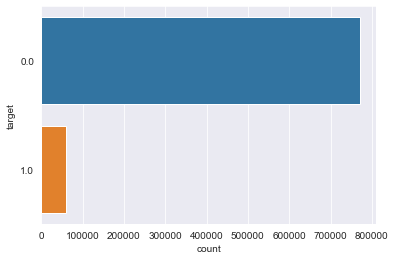

In [19]:
sns.countplot(y='target', data=df_train)

In [20]:
df_train.groupby(by='target').count()

,id,vas_id,buy_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,...,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467,771467
1.0,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,...,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186,60186


**OBSERVATIONS**:
* We have an imbalanced target, might have to do stratified shuffle split

#### Feature distribution

In [21]:
f_nunique = features.apply(lambda features: features.nunique(dropna=False))
f_nunique_col = f_nunique.index.tolist()
f_nunique.shape

(256,)

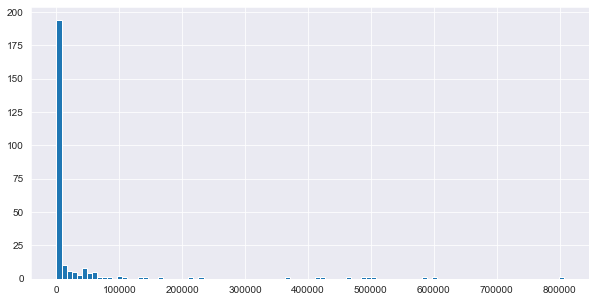

In [22]:
f_nunique.hist(bins=100, figsize=(10, 5));

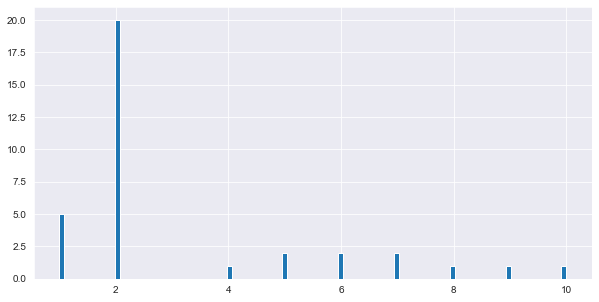

In [23]:
f_nunique[f_nunique<=10].hist(bins=100, figsize=(10, 5));

**OBSERVATIONS**:
* We have some features with only single value. These features have to be removed as they don't bring any useful information 
* We have quite a few features with 2 unique values
* We have some features with the number of unique values less than 10. They that can be treated as categorical/discrete features

In [24]:
discrete_f_col = f_nunique[(f_nunique[f_nunique<=10]) & (f_nunique[f_nunique>1])].index

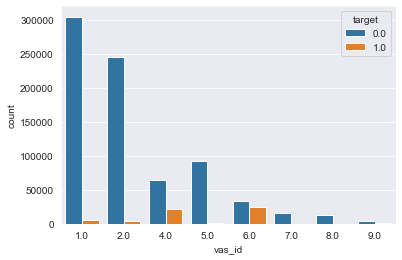

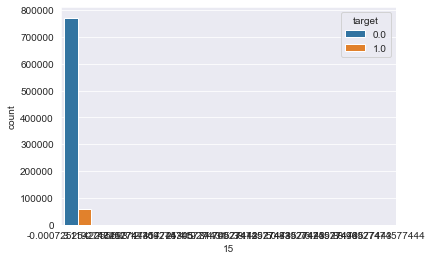

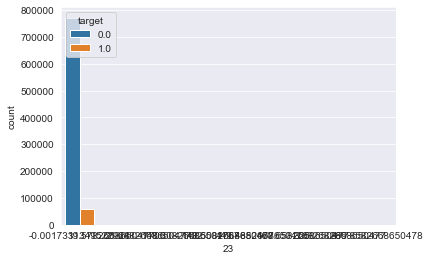

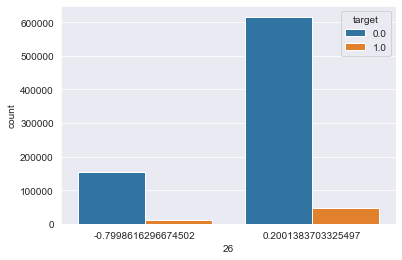

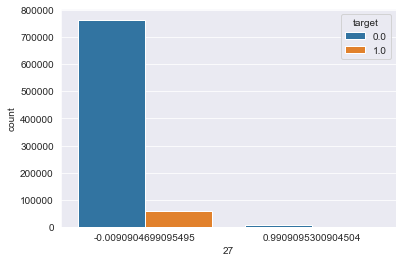

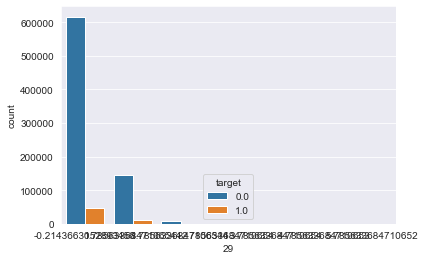

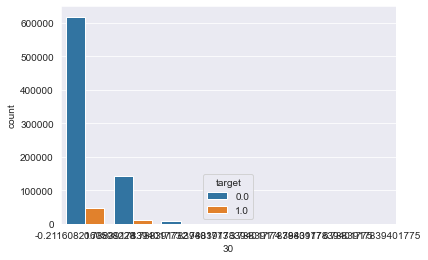

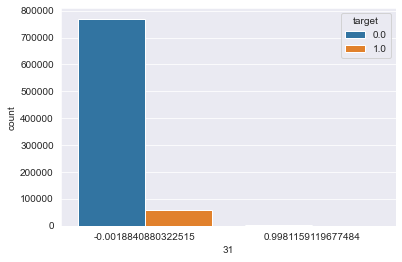

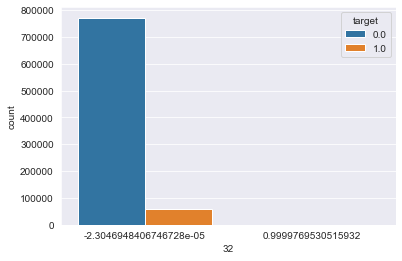

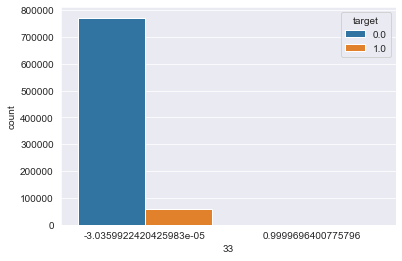

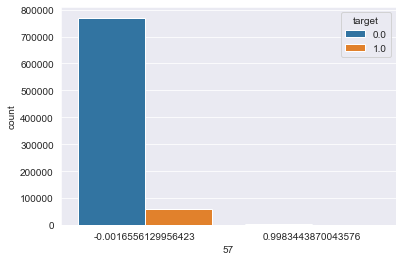

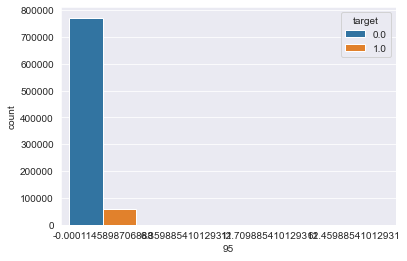

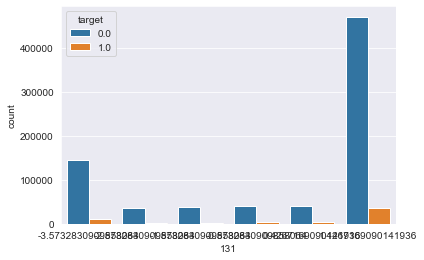

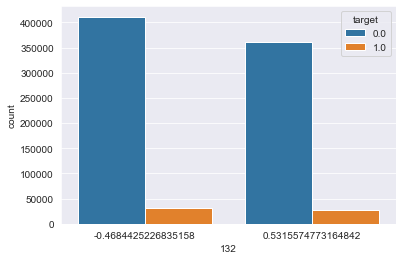

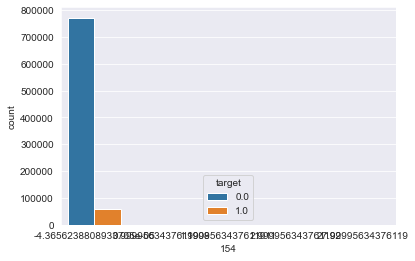

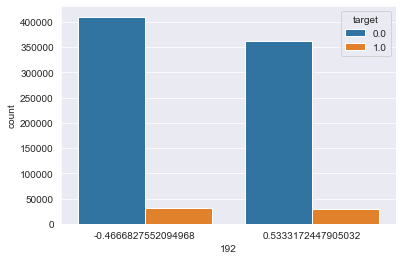

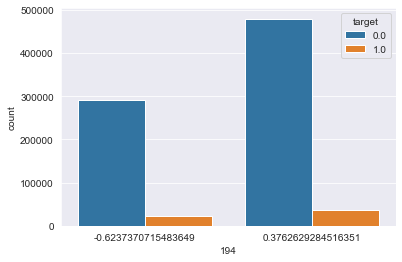

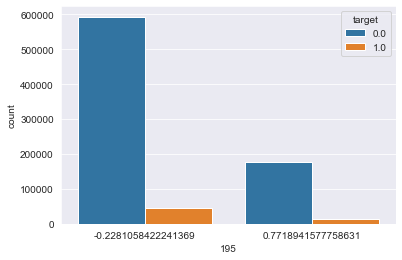

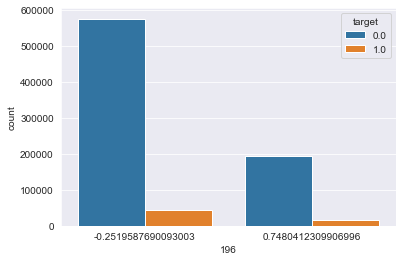

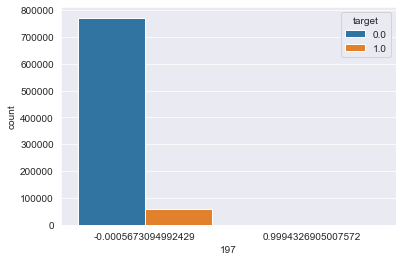

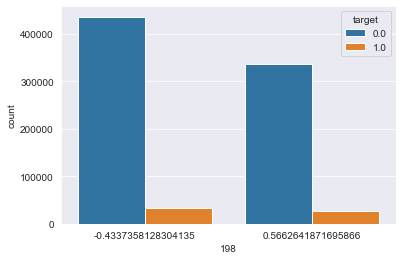

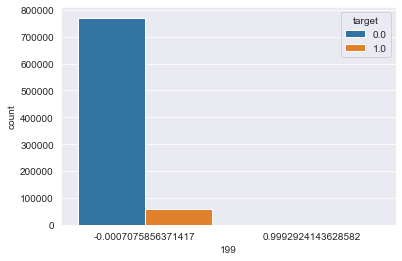

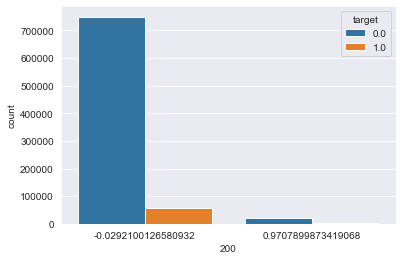

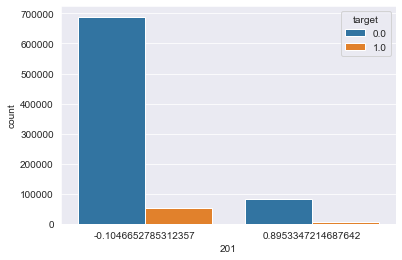

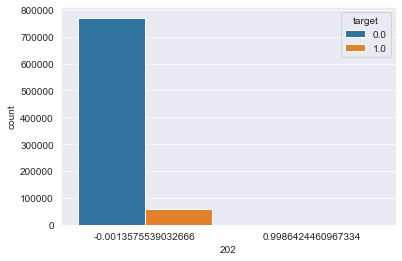

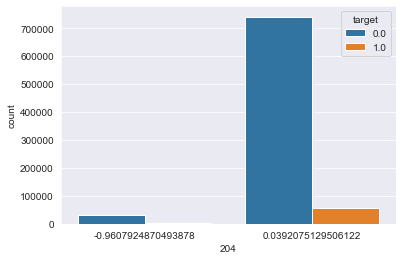

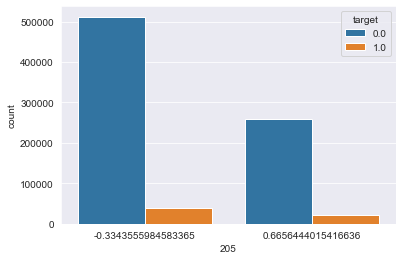

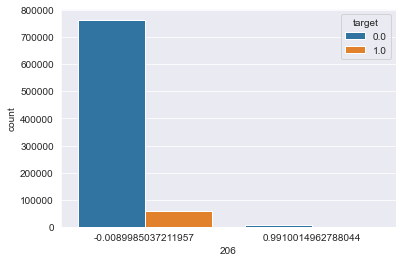

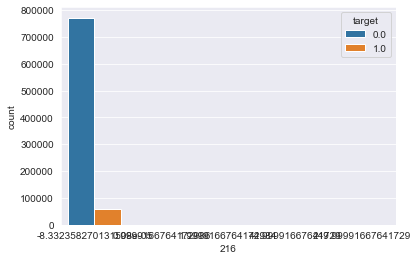

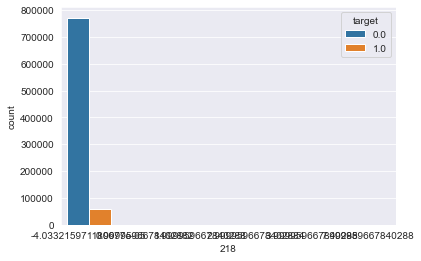

In [25]:
for feature in discrete_f_col:
    sns.countplot(x =feature, hue = "target", data = df_train)
    plt.show()

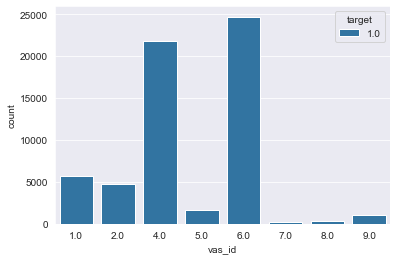

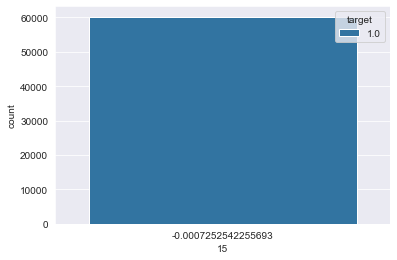

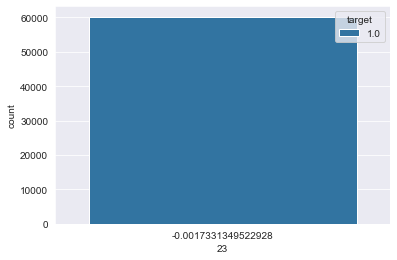

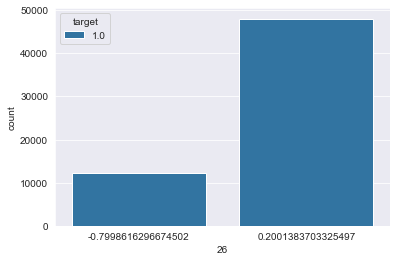

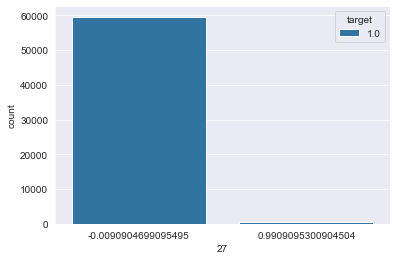

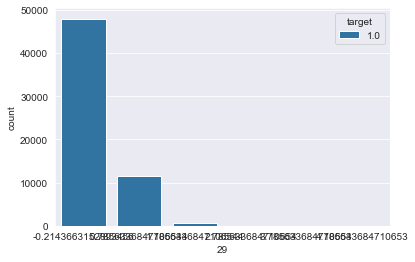

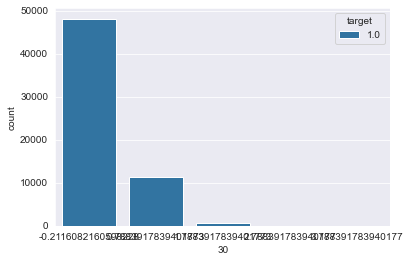

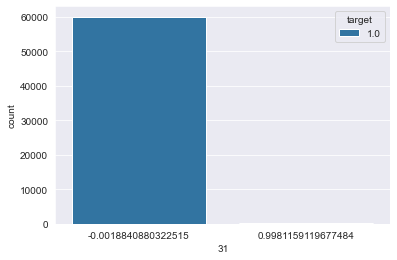

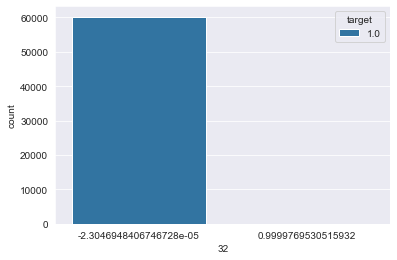

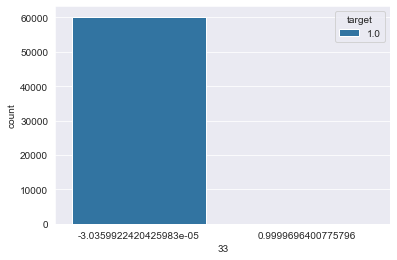

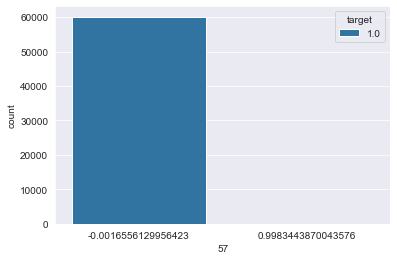

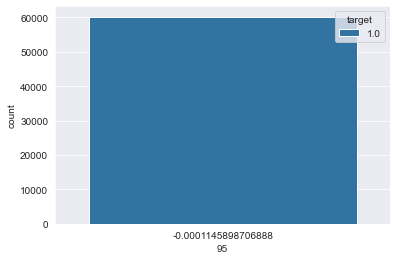

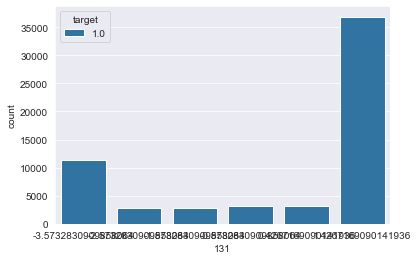

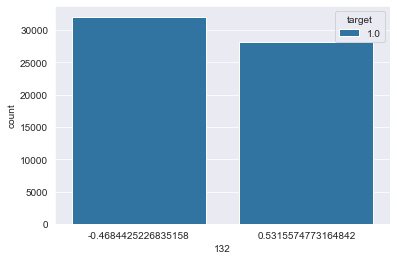

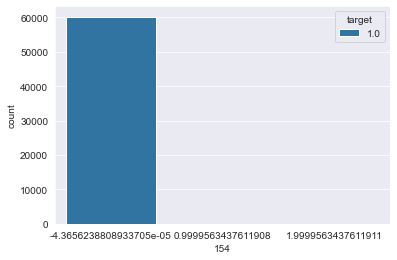

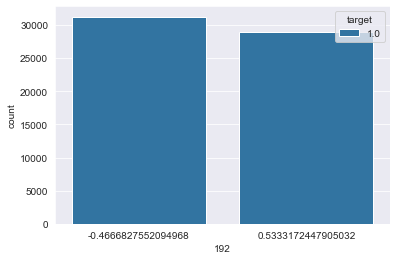

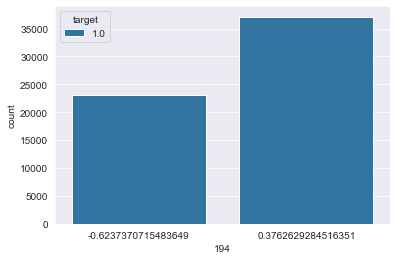

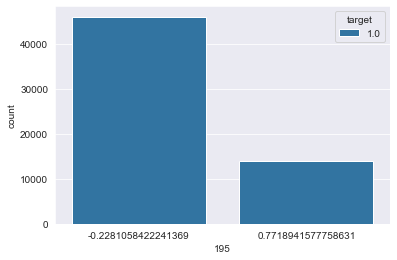

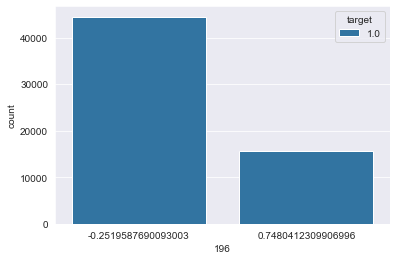

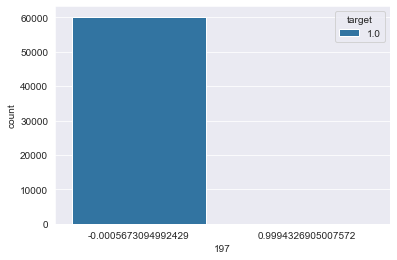

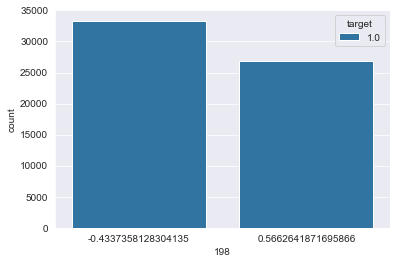

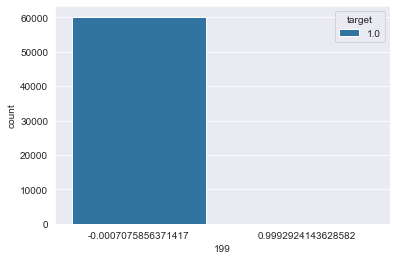

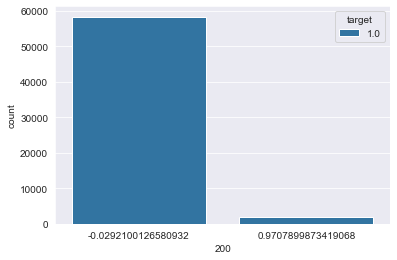

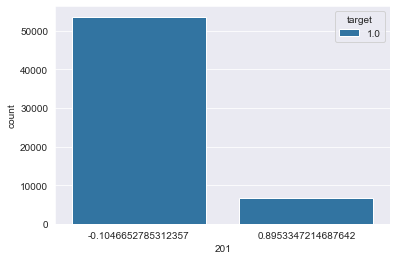

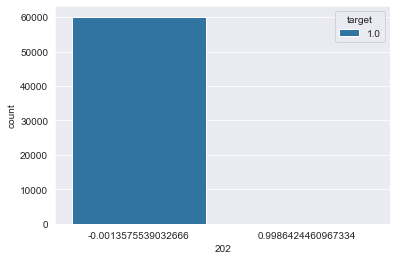

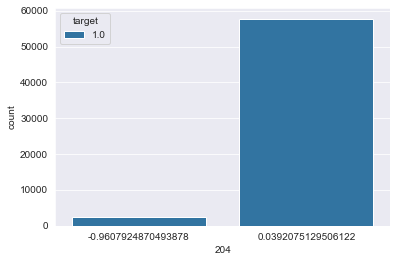

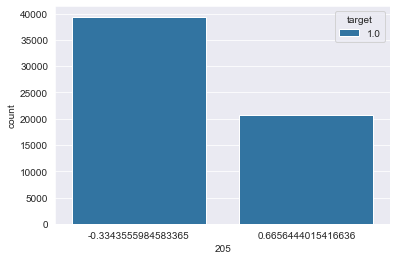

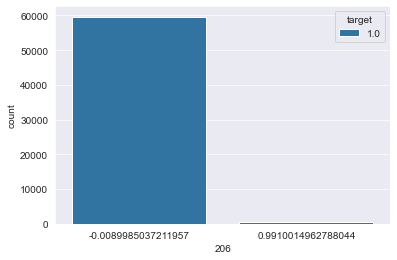

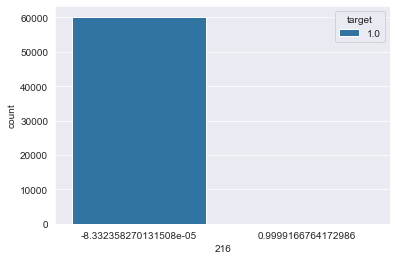

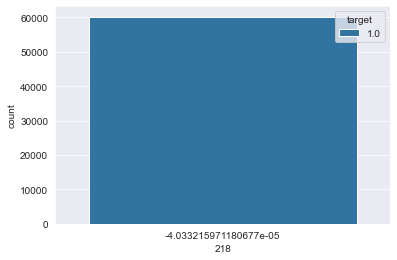

In [26]:
for feature in discrete_f_col:
    sns.countplot(x =feature, hue = "target", data = df_train[df_train['target']==1])
    plt.show()

**OBSERVATIONS**:
* It seems like 27, 31, 32, 33, 57, 197, 199, 200, 201, 202, 204, 206 features are very informative and can be very useful during feature engineering

In [27]:
numeric_f_col = f_nunique[f_nunique>10].index.to_list()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'buy_time'}>,
        <AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>],
       [<AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <Axes

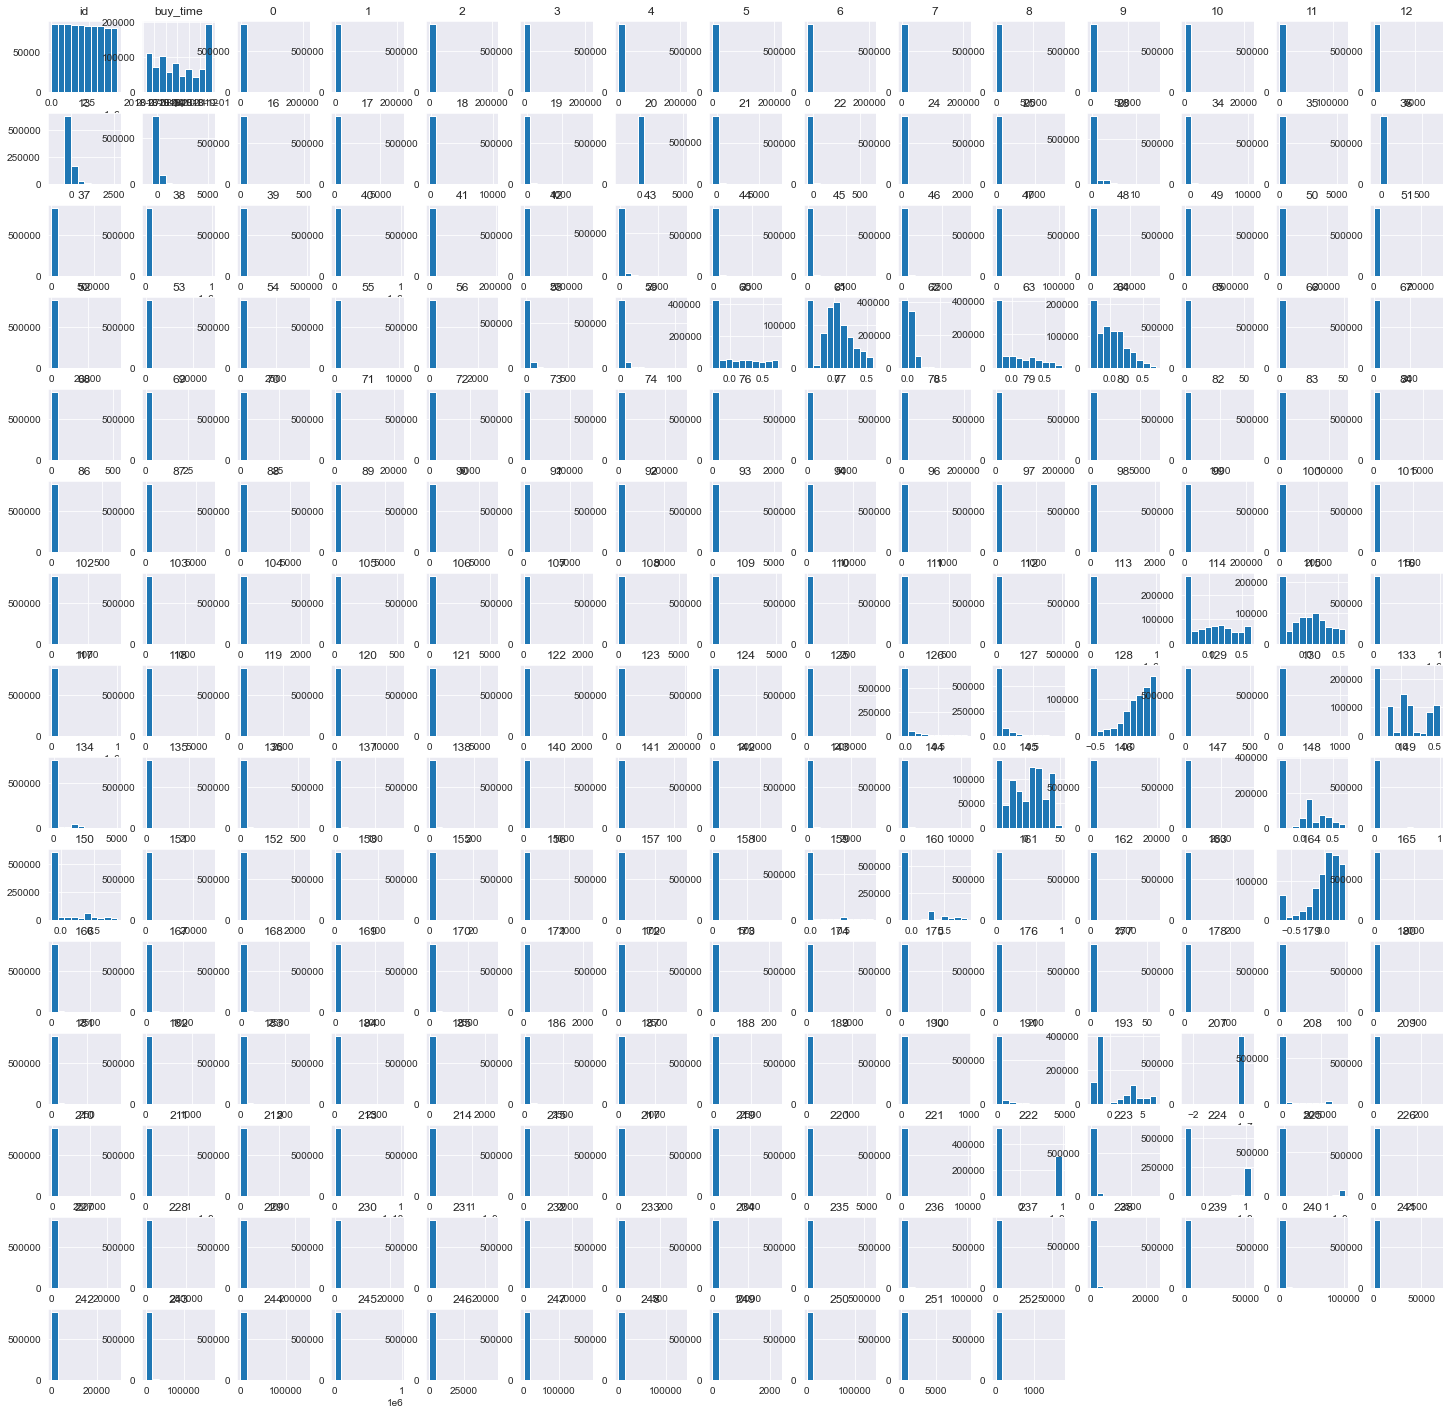

In [28]:
df_train[numeric_f_col].hist(figsize=(25, 25))

**OBSERVATIONS**:
* It sems like we have some potential outliers as the distribution for many numeric featires are not nornal

In [29]:
# Calculate correlations between numeric features
corr_matrix = df_train.corr().abs().round(3)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

**Check for Multicollinearity**

In [30]:
# Calculate correlations between numeric features
corr_matrix = df_train.corr().abs().round(3)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [31]:
# Get list of features with high collinearity
multicollinear_f_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(f'Features which are highly correlated with other features:')
print(f'Count: {len(multicollinear_f_to_drop)}')
print(f'List: {multicollinear_f_to_drop}')

Features which are highly correlated with other features:
Count: 25
List: ['2', '4', '5', '14', '33', '35', '51', '71', '72', '78', '79', '112', '113', '116', '123', '124', '137', '138', '142', '151', '162', '170', '186', '217', '220']


In [32]:
# Check how those features correlate with target
multicollinear_f_to_drop.append('target')
correlations_to_drop = df_train[multicollinear_f_to_drop].corr().abs().round(3)
correlations_to_drop['target'].sort_values(ascending=False)

target    1.000
5         0.004
138       0.003
112       0.002
217       0.002
186       0.002
137       0.002
124       0.002
4         0.002
2         0.002
72        0.002
116       0.002
113       0.001
123       0.001
71        0.001
35        0.001
170       0.001
14        0.001
79        0.000
78        0.000
51        0.000
142       0.000
151       0.000
162       0.000
33        0.000
220       0.000
Name: target, dtype: float64

**OBSERVATIONS**:
* We have 25 features with high collinearity with other features and low collinearity with the target. We might want to delete them to decrese the number of feature and make sure they are affected our models 

## Data Cleansing and Feature engineering

**Check for duplicates and null values**

In [33]:
print("Number of duplicates on the Train dataset:", df_train.duplicated().sum())
print("Number of duplicates on the Test dataset:", df_test.duplicated().sum())
print("Percentage of observations with null values on the Train dataset: %d%%" % float((df_train.isnull().sum() > 0).sum()/df_train.shape[1]*100))
print("Percentage of observations with null values on the Test dataset: %d%%" % float((df_test.isnull().sum() > 0).sum()/df_test.shape[1]*100))

Number of duplicates on the Train dataset: 0
Number of duplicates on the Test dataset: 0
Percentage of observations with null values on the Train dataset: 0%
Percentage of observations with null values on the Test dataset: 0%


**OBSERVATIONS**:
* We don't have duplicates 
* We don't have observations with null values

**Remove features that have a constant value in all observations**

In [34]:
not_useful_features = df_train.columns[df_train.nunique() <= 1].to_list()
print(f'Features with constant value for all observations:')
print(f'Count: {len(not_useful_features)}')
print(f'List: {not_useful_features}')

Features with constant value for all observations:
Count: 5
List: ['75', '81', '85', '139', '203']


In [35]:
df_train.drop(columns=not_useful_features, inplace=True)
df_test.drop(columns=not_useful_features, inplace=True)

**OBSERVATIONS**:
* Features with constant value for all observations useless   
* Those features were removed

**Remove features that have a corr on 0.95 or higher**

In [36]:
# Calculate correlations between numeric features
corr_matrix = df_train.corr().abs().round(3)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [37]:
# Get list of features with high collinearity
multicollinear_f_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df_train.drop(columns=multicollinear_f_to_drop, inplace=True)
df_test.drop(columns=multicollinear_f_to_drop, inplace=True)

**OBSERVATIONS**:
* Features which are highly correlated with other features not very useful   
* Those features were removed

**Create Descrete features**

In [38]:
descrete_features = df_train.columns[df_train.nunique() <=25].to_list()
print(f'Descrete features with 25 or less unique values :')
print(f'Count: {len(descrete_features)}')
print(f'List: {descrete_features}')

Descrete features with 25 or less unique values :
Count: 38
List: ['vas_id', 'target', '15', '16', '23', '24', '26', '27', '28', '29', '30', '31', '32', '57', '65', '69', '95', '131', '132', '133', '154', '155', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '204', '205', '206', '216', '218']


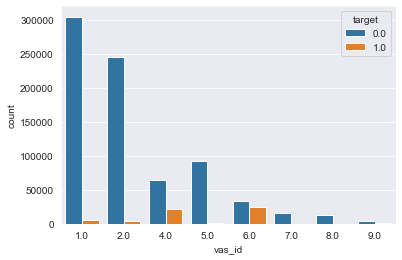

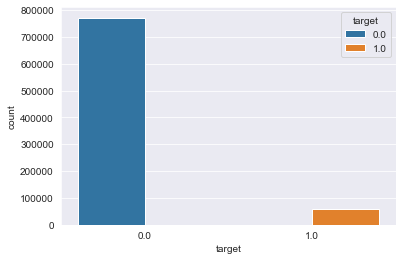

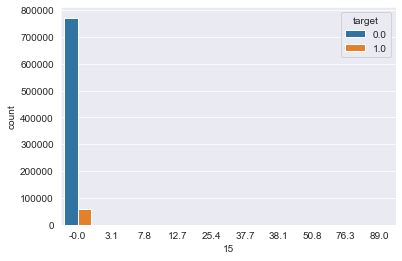

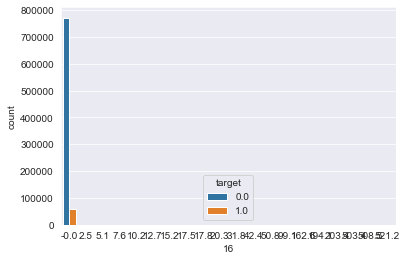

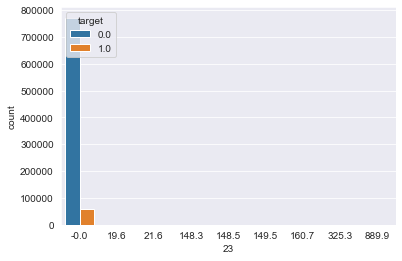

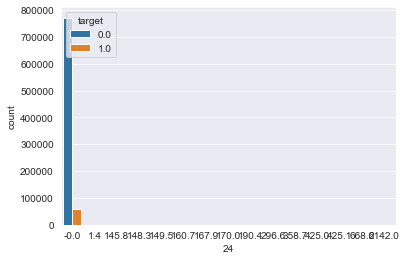

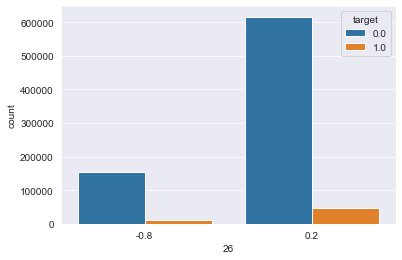

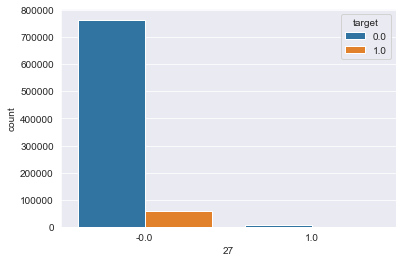

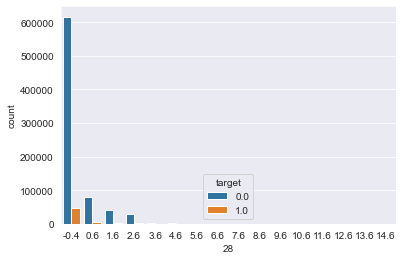

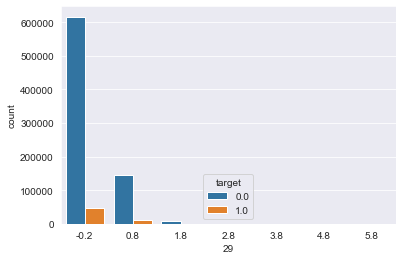

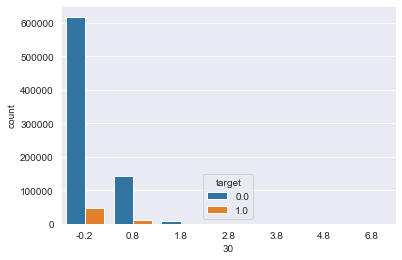

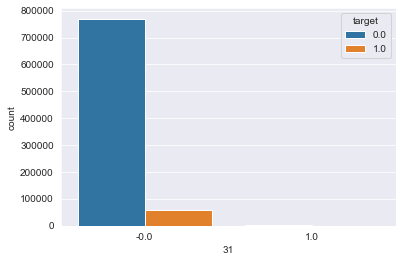

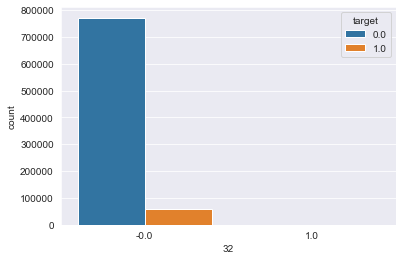

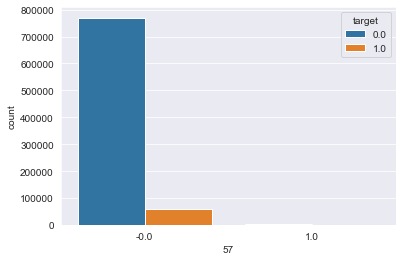

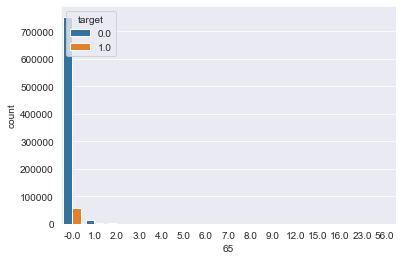

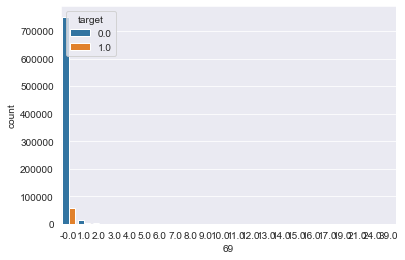

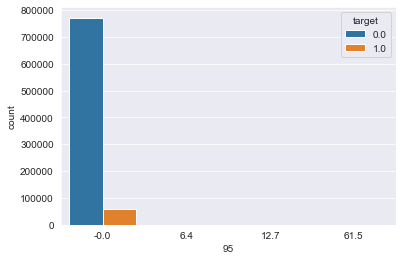

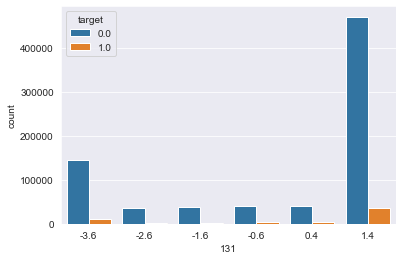

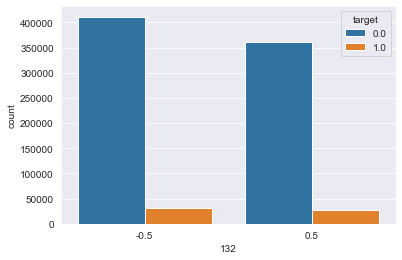

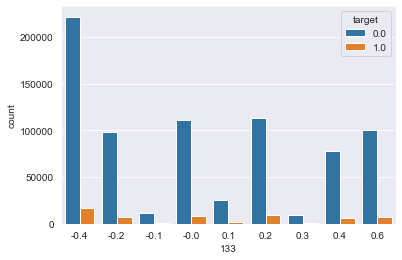

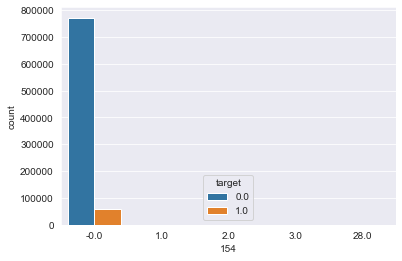

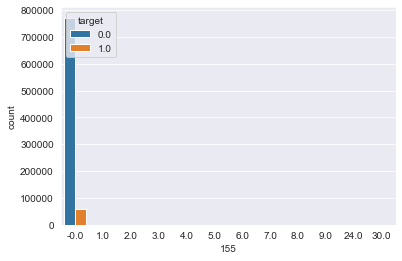

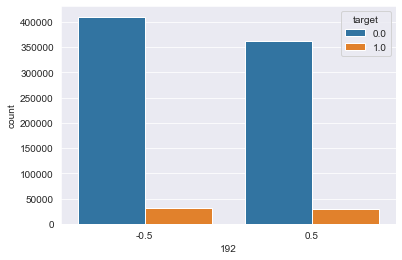

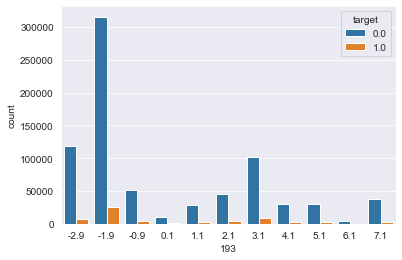

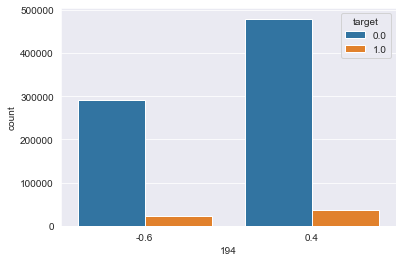

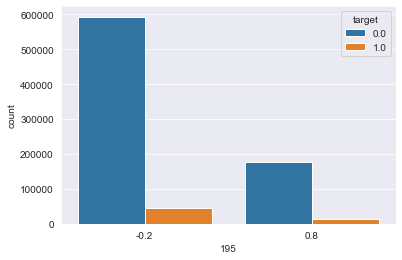

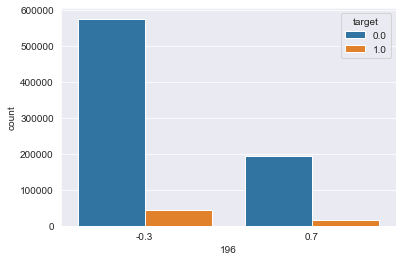

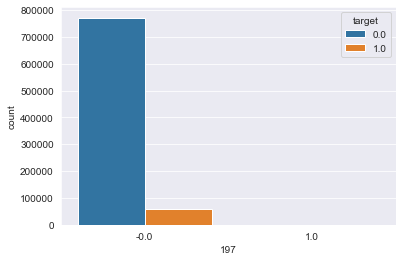

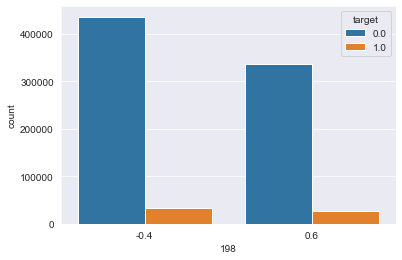

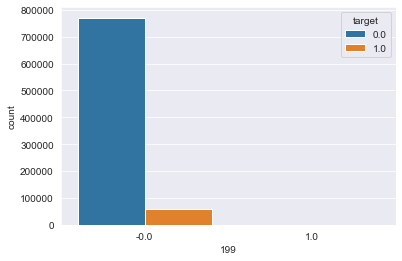

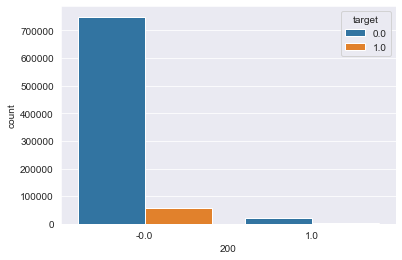

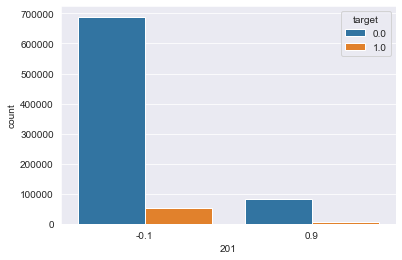

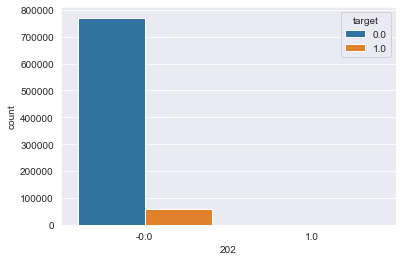

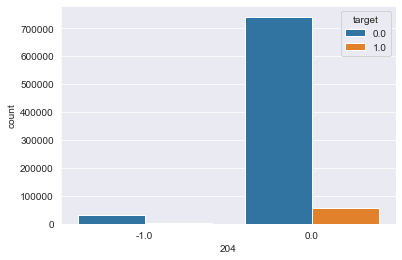

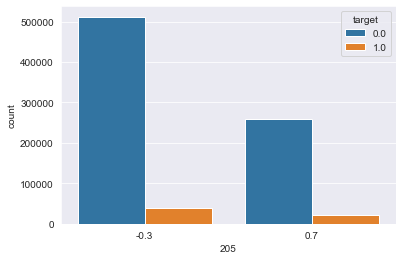

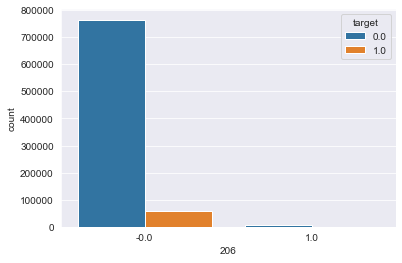

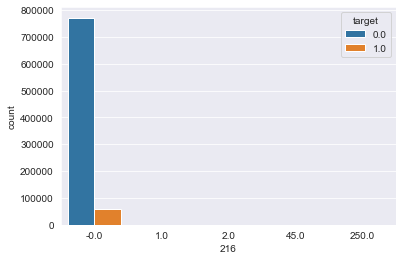

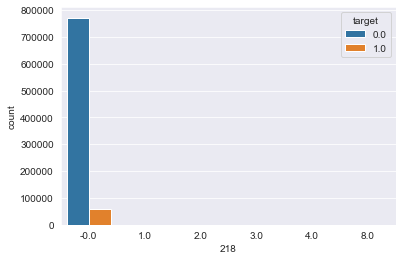

In [39]:
for feature in descrete_features:
    sns.countplot(x =feature, hue = "target", data = df_train.round(1))
    plt.show()

**OBSERVATIONS**:
* We have 38 feature with 25 or less unique values 
* There are 22 features that can be divided into two groups and observe as seperate features. The features are: 15, 23, 26, 27, and 31, 32, 57, and 95, 132, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205
* There are 5 features that can be divided into 4 groups and observe as seperate features. The features are: 16, 24, 154, 155, 216, 252

In [40]:
# Filter data in the seleted feature which are above passed value: ex: feature_data > passed value
# Create a new feature with 0 and 1. 1 if condition == True, 0 if condition == True
# Param: feature, data(dataframe), value_above(value to compare to)
def generate_new_f_value_above(feature, data, value_above):
    new_feature_name = f'f{feature}_above_{np.absolute(value_above)}'
    data[new_feature_name] = (data[feature] > value_above).astype('int', copy=True)

# Filter data in the seleted feature which are below passed value: ex: feature_data < passed value
# Create a new feature with 0 and 1. 1 if condition == True, 0 if condition == True  
# Param: feature, data(dataframe), value_below(value to compare to)
def generate_new_f_value_below(feature, data, value_below):
    new_feature_name = f'f{feature}_below_{np.absolute(value_below)}'
    data[new_feature_name] = (data[feature] < value_below).astype('int', copy=True)

# Filter data in the seleted feature which are between passed values: ex: feature_data between lower and upper
# Create a new feature with 0 and 1. 1 if condition == True, 0 if condition == True  
# Param: feature, data(dataframe), upper and lower(borders)    
def generate_new_f_values_between(feature, data, lower, upper):
    new_feature_name = f'f{feature}_between_{np.absolute(lower)}_and_{np.absolute(upper)}'
    data[new_feature_name] = ((data[feature] < upper) & (data[feature] > lower)).astype('int')
    data[new_feature_name].astype('int')

# Call two functions   
def split_generate(feature, data, value_to_split):
    generate_new_f_value_above(feature, data, value_to_split)
    generate_new_f_value_below(feature, data, value_to_split)

# FIlter values in the feature, generate new features and drop the original
def split_generate_drop(feature, data, value_to_split):
    split_generate(feature, data, value_to_split)
    data.drop(columns=[feature], inplace=True) 

 # FIlter values in the feature, generate new features and drop the original   
def split_generate_drop_multiple(feature, data, values_to_split):
    for i, val in enumerate(values_to_split):
        if i == 0:
            generate_new_f_value_below(feature, data, val)
            generate_new_f_values_between(feature, data,val, values_to_split[i+1])            
        elif i == (len(values_to_split)-1):
            generate_new_f_value_above(feature, data, val) 
        else:
            generate_new_f_values_between(feature, data,val, values_to_split[i+1])
    data.drop(columns=[feature], inplace=True) 

In [41]:
# Features that can be divided into two groups
f_to_split_two_groups = {'15': 3,
                        '23': 1,
                        '26': 0,
                        '27': 0.5,
                        '31': 0.5,
                        '32': 0.5,
                        '57': 0.5,
                        '95': 5,
                        '132': 0,
                        '192': 0,
                        '194': 0,
                        '195': 0,
                        '196': 0,
                        '197': 0.5,
                        '198': 0,
                        '199': 0.5,
                        '200': 0.5,
                        '201': 0.5,
                        '202': 0.5,
                        '204': -0.5,
                        '205': 0,
                        '206': 0.5,
                        '218': 0.5
                        }

# Divide features intotwo groups and drop the original one
for feature, value in f_to_split_two_groups.items():
    split_generate_drop(feature, df_train, value)
    
for feature, value in f_to_split_two_groups.items():
    split_generate_drop(feature, df_test, value)

In [42]:
# Features that can be divided into multiple groups
f_to_split_mult_groups = {'16': [1, 17.5, 18],
                          '24': [1, 146, 149],
                          '154': [0.5, 1.5, 2.5],
                          '155': [0.5, 1.5, 2.5],
                          '216': [0, 1]
                         }

# Divide features into multiple groups and drop the original one
for feature, values in f_to_split_mult_groups.items():
    split_generate_drop_multiple(feature, df_train, values)
    
for feature, values in f_to_split_mult_groups.items():
    split_generate_drop_multiple(feature, df_test, values)

**Remove outliers**

**OBSERVATIONS**:
* We selected the best model as a catboost, so we can keep all observations as they all bring some infromation

**Generate new features based on the id and vas_id columns**

In [43]:
df_train['mult_attemps_mult_vas'] = (df_train.groupby(['id', 'vas_id'])['buy_time'].transform('count')>1).astype('int')
df_test['mult_attemps_mult_vas'] = (df_test.groupby(['id', 'vas_id'])['buy_time'].transform('count')>1).astype('int')
df_train['mult_attemps'] = df_train['id'].duplicated().astype('int')
df_test['mult_attemps'] = df_test['id'].duplicated().astype('int')

**OBSERVATIONS**:
* We generated two new features:

    1. Identified users that recevied more then one offer
    2. Identified users that recevied more then one offer for the same vas_id

**Generate new features based on buy_time**

In [44]:
df_train['buy_time_month'] = df_train['buy_time'].dt.month.astype('int')
df_test['buy_time_month'] = df_test['buy_time'].dt.month.astype('int')
df_train['buy_time_week'] = df_train['buy_time'].dt.isocalendar().week.astype('int')
df_test['buy_time_week'] = df_test['buy_time'].dt.isocalendar().week.astype('int')
df_train['buy_time_day'] = df_train['buy_time'].dt.isocalendar().day.astype('int')
df_test['buy_time_day'] = df_test['buy_time'].dt.isocalendar().day.astype('int')

df_train.drop(columns=['buy_time'], inplace=True)
df_test.drop(columns=['buy_time'], inplace=True)

**OBSERVATIONS**:
* We didn't create year as all observations are for 2018 year
* We didn't create a feature to check a day type as promotions were sent every time on monday

### BEST MODEL: CATBOOST

**NOTE**:
* Our best model is CatBoost
* We are not going to remove outliers neither normilize data as Catboost doesn't require to do that
* We keep only the best parameters 

**Split data**

In [45]:
X = df_train.drop(columns=['target'])
y = df_train['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234, 
                                                    stratify=df_train['target'])

print(f'X_train: {len(X_train)}, X_test: {len(X_test)}, y_train: {len(y_train)}, y_test: {len(y_test)}')

X_train: 665322, X_test: 166331, y_train: 665322, y_test: 166331


**Identify categorical features**

In [46]:
cat_features = list(X.select_dtypes(exclude=[float]).columns)

**Fit and predict**

In [47]:
CBC = CatBoostClassifier(random_state=1234)

cb_hyperparameters = {'depth': [8],
                      'learning_rate': [0.04],
                      'iterations': [50]
                     }

In [48]:
cb_model = GridSearchCV(CBC, cb_hyperparameters, n_jobs=-1, cv=5)

# Fit model on X_train, y_train
cb_model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), verbose=False)

# Make a prediction
pred = cb_model.predict(X_test)
pred_proba = cb_model.predict_proba(X_test)[:,1]

In [49]:
print(f'roc_auc_score: {roc_auc_score(y_test, pred)}')
print(f'f1_score: {f1_score(y_test, pred, average="macro")}')
print(f'accuracy_score: {accuracy_score(y_test, pred)}')

roc_auc_score: 0.6992470757949272
f1_score: 0.7669965981964408
accuracy_score: 0.9540314192784267


In [67]:
pred = cb_model.predict(df_test)
df_to_csv = df_test_init.drop(columns=df_test_init.columns[0])
df_to_csv['target'] = pred
df_to_csv = df_to_csv[['buy_time', 'id', 'vas_id', 'target']]
df_to_csv.to_csv('data/answers_test.csv', index=None)

**Save mode**

In [68]:
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(cb_model.best_estimator_, f)